In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

from data_center.binance_handler import BinanceHandHandler
from backtest.performance_generater import PerformanceGenerator
from backtest.operators import *

import alphalens
import plotly.graph_objects as go

In [2]:
Open = BinanceHandHandler().get_factor_data('open').dropna()
High = BinanceHandHandler().get_factor_data('high').dropna()
Low  = BinanceHandHandler().get_factor_data('low').dropna()
Close = BinanceHandHandler().get_factor_data('close').dropna()
Volume = BinanceHandHandler().get_factor_data('volume').dropna()
Volvalue = BinanceHandHandler().get_factor_data('volvalue').dropna()
Takerbuy = BinanceHandHandler().get_factor_data('takerbuy').dropna()
Takerbuyvalue = BinanceHandHandler().get_factor_data('takerbuyvalue').dropna()

returns = Close.pct_change()
expreturn = Close.pct_change().shift(-2)
Benchmark = expreturn['BTCUSDT']
Close

BTCUSDT  ETHUSDT  BNBUSDT  AAVEUSDT  AVAXUSDT  ETCUSDT  SOLUSDT  \
datetime                                                                      
2022-08-17  23333.1  1833.55   306.75    100.17    25.540   40.290   40.510   
2022-08-18  23185.1  1845.86   297.96     94.79    24.180   39.541   39.480   
2022-08-19  20824.9  1608.29   278.99     83.31    22.420   32.884   35.790   
2022-08-20  21127.8  1574.93   283.41     82.70    22.280   32.722   35.250   
2022-08-21  21505.6  1617.17   301.61     85.88    22.950   33.628   36.450   
...             ...      ...      ...       ...       ...      ...      ...   
2024-03-19  61974.1  3161.00   507.96    109.41    53.664   27.724  169.917   
2024-03-20  67876.4  3517.80   556.99    120.25    57.077   30.620  191.916   
2024-03-21  65539.9  3495.16   554.13    123.45    53.860   30.327  179.535   
2024-03-22  63826.0  3339.00   554.31    119.05    53.456   29.365  175.257   
2024-03-23  64020.3  3330.96   552.15    121.48    53.482   30.277  172.725   

            ADAUSDT  LINKUSDT  BCHUSDT  ...  UNIUSDT  XRPUSDT  XLMUSDT  \
datetime                                ...                              
2022-08-17   0.5382     8.057   133.70  ...    7.958   0.3794  0.12122   
2022-08-18   0.5115     7.644   128.97  ...    7.568   0.3700  0.11575   
2022-08-19   0.4496     6.894   114.30  ...    6.889   0.3341  0.10797   
2022-08-20   0.4502     6.893   114.47  ...    6.994   0.3364  0.10886   
2022-08-21   0.4622     7.076   119.55  ...    7.205   0.3445  0.11087   
...             ...       ...      ...  ...      ...      ...      ...   
2024-03-19   0.5866    16.816   358.65  ...   10.621   0.5850  0.12078   
2024-03-20   0.6399    18.425   409.89  ...   11.921   0.6112  0.13091   
2024-03-21   0.6323    18.468   414.46  ...   12.196   0.6412  0.13343   
2024-03-22   0.6152    18.380   431.36  ...   11.771   0.6119  0.12838   
2024-03-23   0.6235    18.078   456.30  ...   11.623   0.6172  0.13274   

            MATICUSDT  TRXUSDT  DOGEUSDT  INJUSDT  DASHUSDT  XEMUSDT  ZECUSDT  
datetime                                                                       
2022-08-17     0.8840  0.06825   0.08019    1.915     53.04   0.0503    74.24  
2022-08-18     0.8561  0.06733   0.07469    1.780     50.35   0.0486    70.08  
2022-08-19     0.7690  0.06398   0.06771    1.673     44.77   0.0451    62.17  
2022-08-20     0.7854  0.06575   0.06929    1.603     45.63   0.0451    62.96  
2022-08-21     0.8201  0.06584   0.06926    1.841     46.78   0.0461    64.62  
...               ...      ...       ...      ...       ...      ...      ...  
2024-03-19     0.9324  0.11233   0.12887   35.912     32.72   0.0421    25.04  
2024-03-20     1.0088  0.12081   0.15223   39.166     35.80   0.0484    28.36  
2024-03-21     0.9963  0.12122   0.15549   37.165     35.79   0.0484    29.43  
2024-03-22     0.9741  0.11741   0.15304   35.306     35.13   0.0464    28.82  
2024-03-23     0.9800  0.11822   0.16202   35.031     35.73   0.0469    28.69  

[585 rows x 22 columns]

### Sharpe Factor

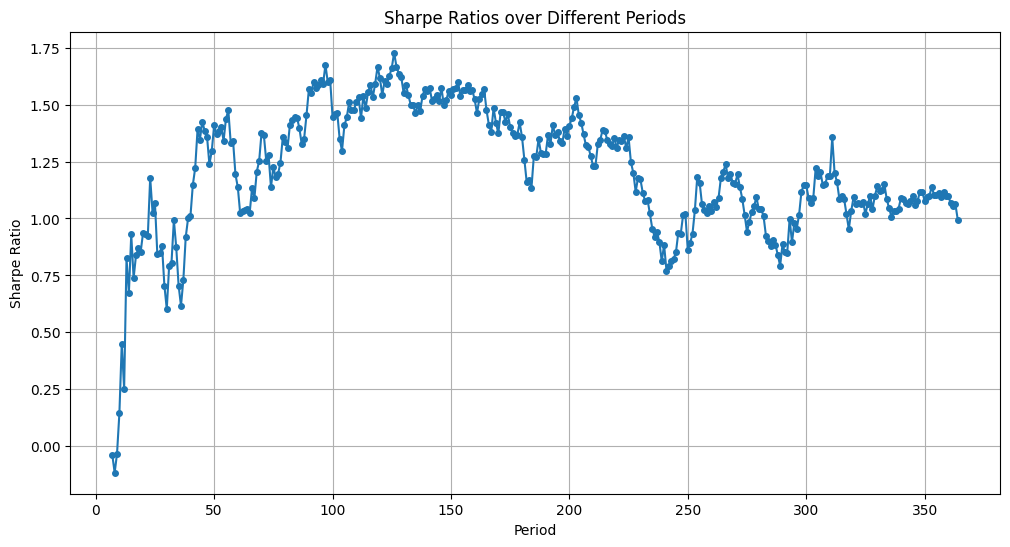

In [7]:
sharpes = []
periods = []

period_range = range(7, 365, 1)

# Iterate over all combinations of period_1 and period_2 using itertools.product
for period in period_range:
    rolling_returns = returns.rolling(window = period).mean()
    rolling_std_dev = returns.rolling(window = period).std()
    alpha_2 = rolling_returns / rolling_std_dev
    returns_by_period = PerformanceGenerator(alpha_2,
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                             ).get_returns_by_period()
    sharpe = PerformanceGenerator(alpha_2,
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                             ).get_sharpe(returns_by_period)

    sharpes.append(sharpe)
    periods.append(period)

import matplotlib.pyplot as plt

# Plot Sharpe Ratios over periods
plt.figure(figsize=(12, 6))
plt.plot(periods, sharpes, marker='o', linestyle='-', markersize=4)
plt.xlabel('Period')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios over Different Periods')
plt.grid(True)
plt.show()

In [8]:
period = 125
rolling_returns = returns.rolling(window = period).mean()
rolling_std_dev = returns.rolling(window = period).std()
sharpe_factor = rolling_returns / rolling_std_dev

returns_by_period, _ = PerformanceGenerator(factor = sharpe_factor, 
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                            ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        57.40 %        |       48.00 %        |     1.66     |    32.98 %     |   12.05 %    |  18.16 %   | 0.95 % |  8.21 %  |
|  Benchmark  |       182.68 %        |       124.04 %       |     1.55     |    92.10 %     |   29.54 %    |  50.25 %   | 2.63 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


Dropped 2.2% entries from factor data: 2.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.174998  0.093885 -0.032227  0.056289   2250  22.727273
2               -0.128978  0.131790  0.007826  0.056023   1800  18.181818
3               -0.083262  0.167255  0.034853  0.057808   1800  18.181818
4               -0.060722  0.198715  0.063540  0.058516   1800  18.181818
5               -0.009805  0.298216  0.121233  0.065721   2250  22.727273

Returns Analysis


1D      5D     10D
Ann. alpha                                      0.268   0.313   0.312
beta                                            0.038   0.041   0.015
Mean Period Wise Return Top Quantile (bps)     13.958  16.022  15.063
Mean Period Wise Return Bottom Quantile (bps)  -5.910 -11.453 -12.774
Mean Period Wise Spread (bps)                  19.868  26.642  26.787

<Figure size 640x480 with 0 Axes>

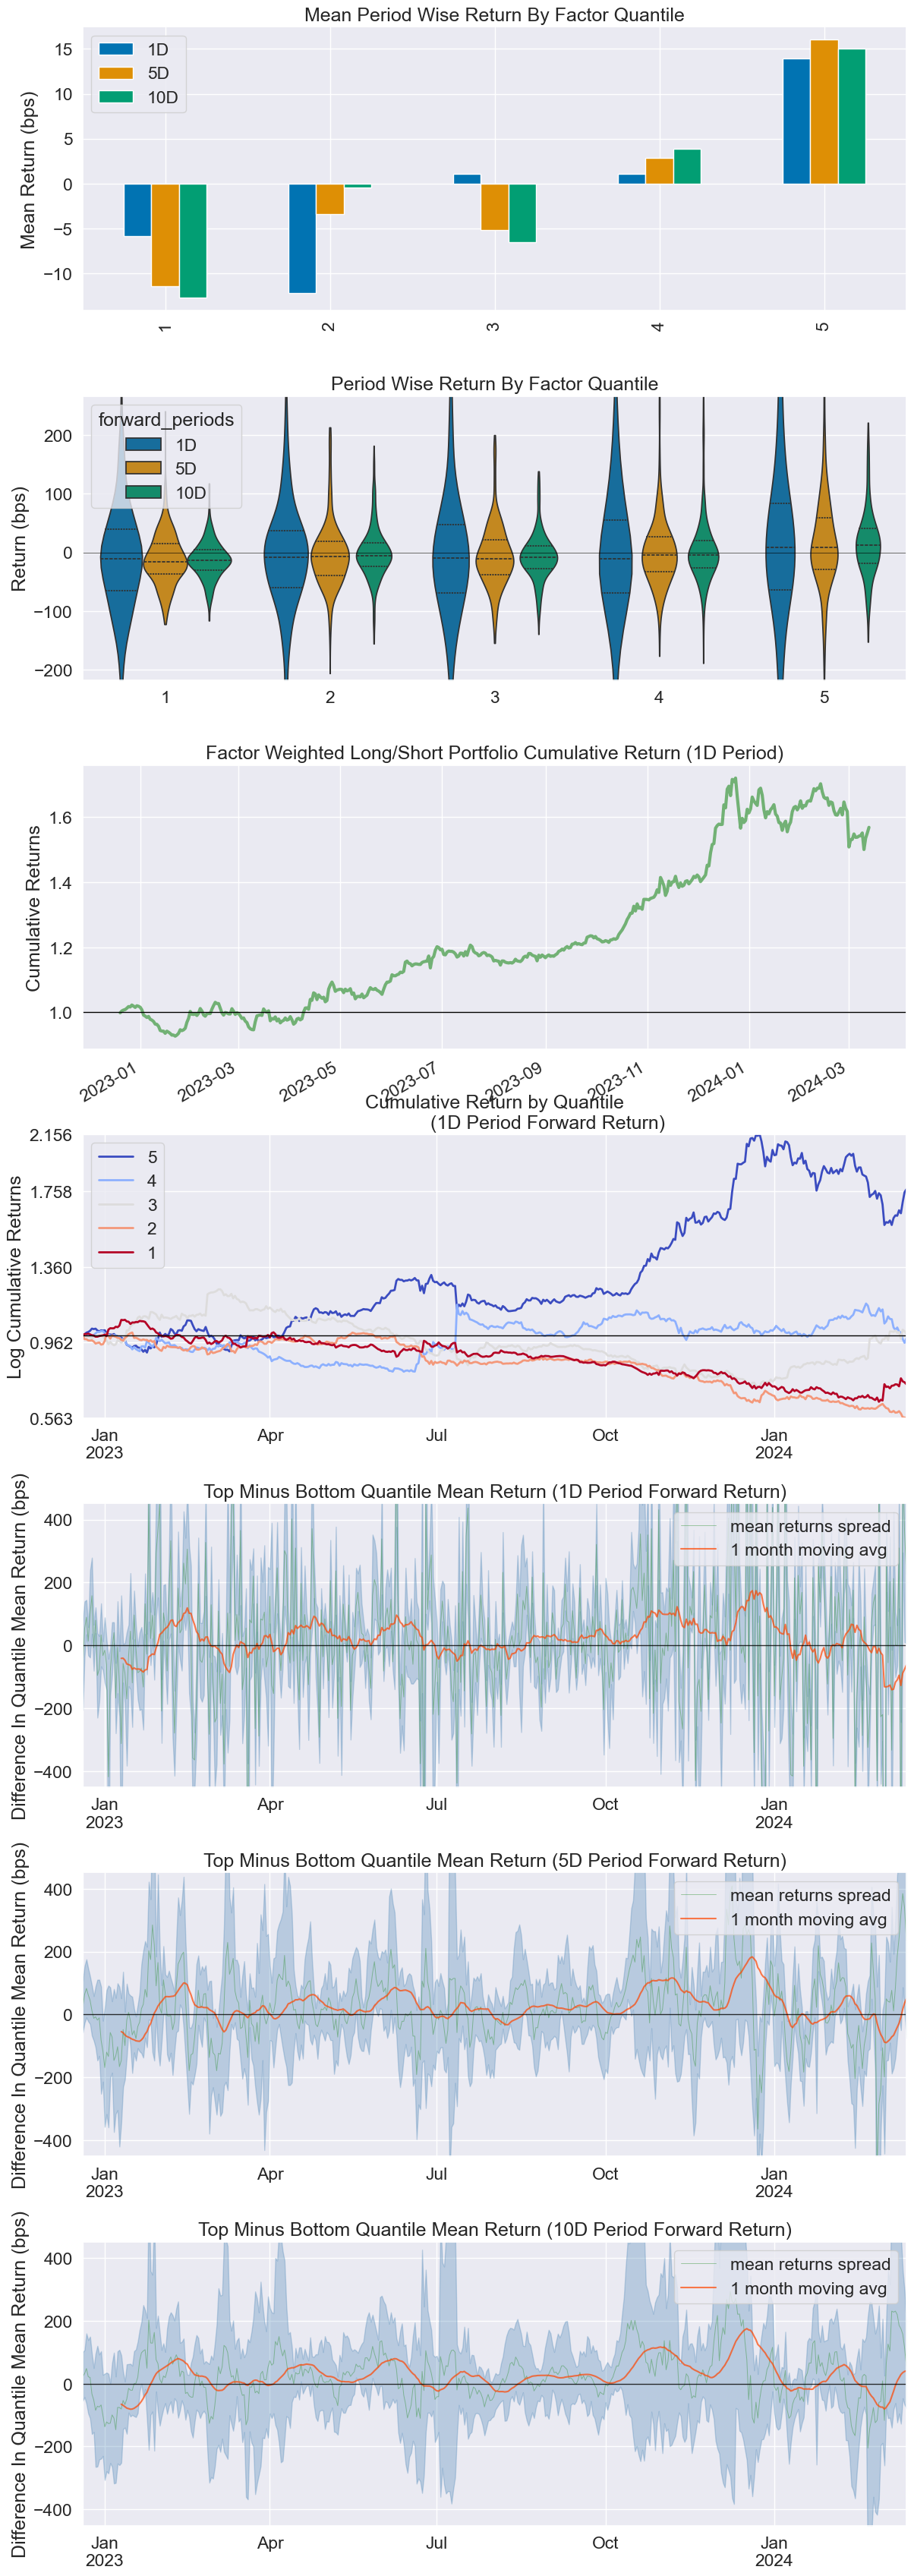

Information Analysis


1D     5D    10D
IC Mean           0.009  0.048  0.076
IC Std.           0.285  0.296  0.286
Risk-Adjusted IC  0.030  0.162  0.266
t-stat(IC)        0.647  3.438  5.636
p-value(IC)       0.518  0.001  0.000
IC Skew          -0.074  0.015 -0.046
IC Kurtosis      -0.369 -0.643 -0.645

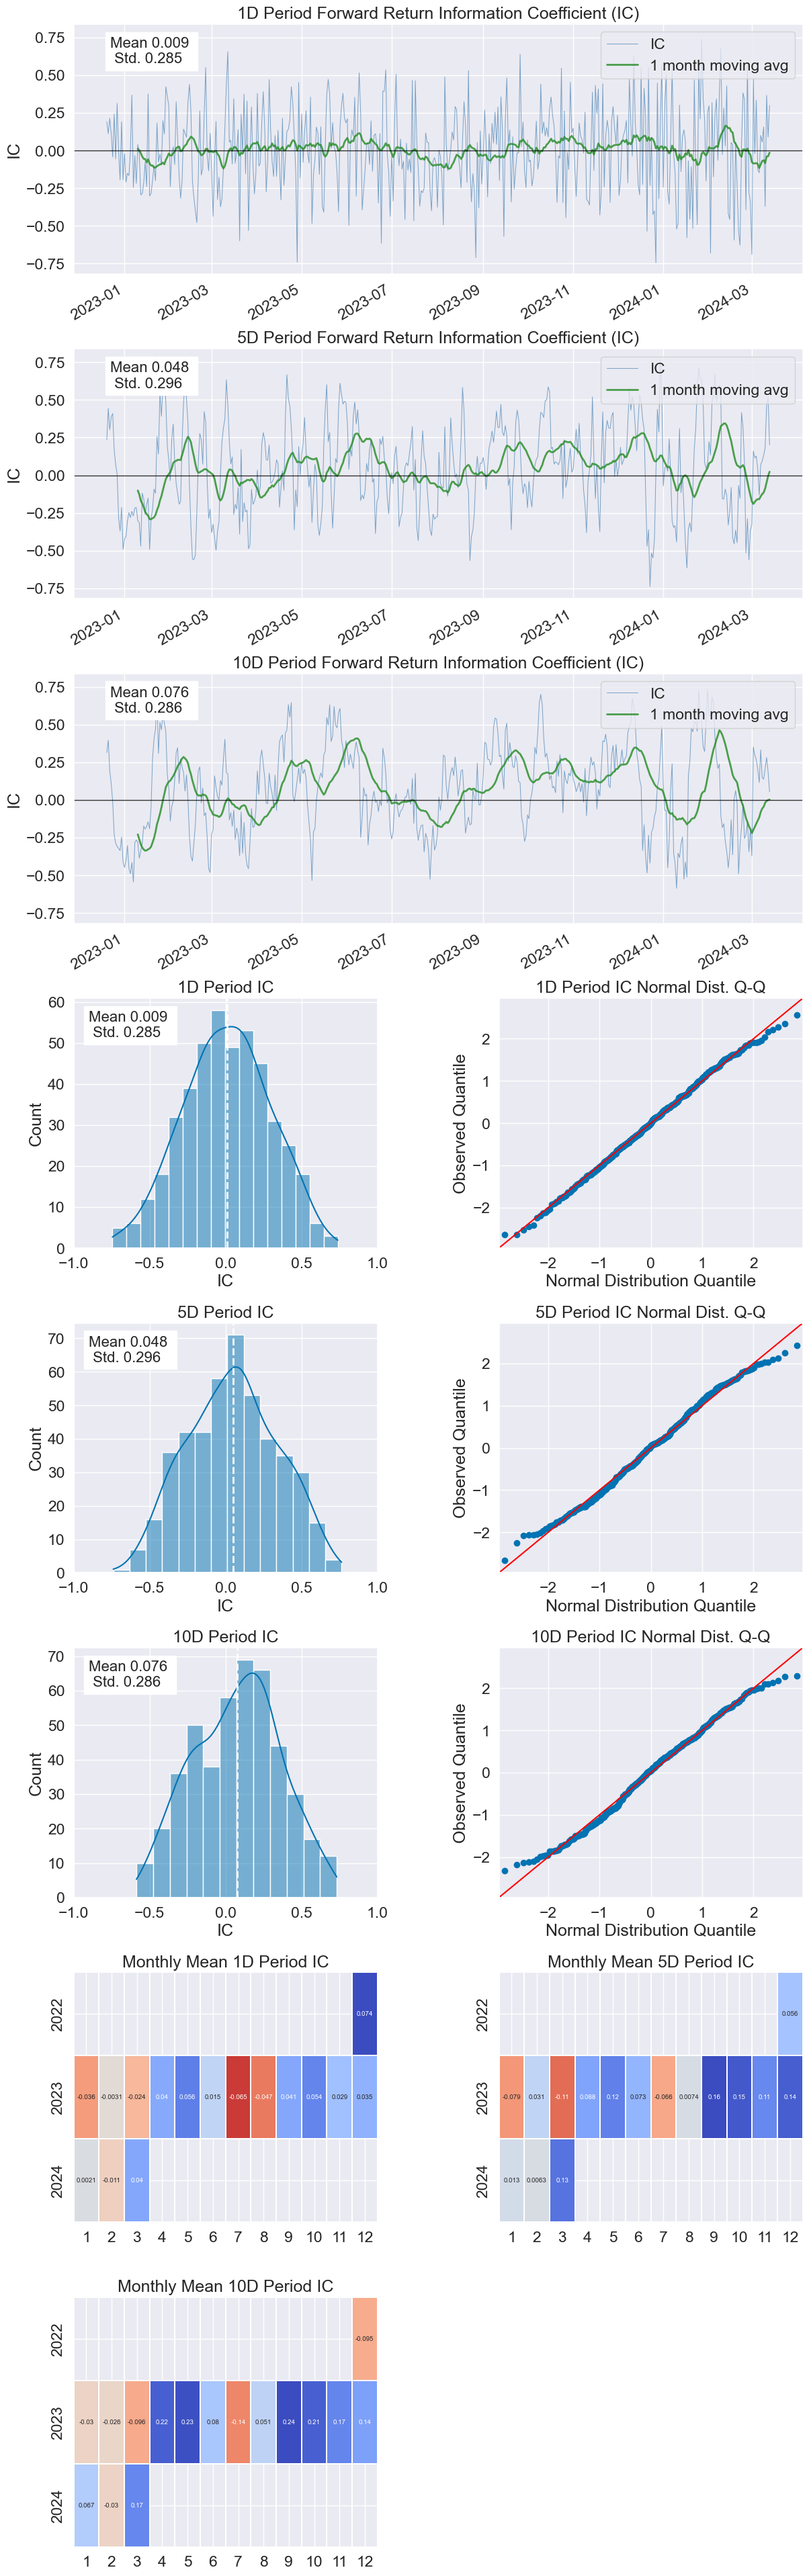

/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/alphalens/utils.py:929: UserWarning:

Skipping return periods that aren't exact multiples of days.



Turnover Analysis


1D     5D    10D
Quantile 1 Mean Turnover   0.076  0.159  0.212
Quantile 2 Mean Turnover   0.190  0.361  0.462
Quantile 3 Mean Turnover   0.194  0.383  0.476
Quantile 4 Mean Turnover   0.158  0.330  0.418
Quantile 5 Mean Turnover   0.053  0.121  0.160

1D     5D    10D
Mean Factor Rank Autocorrelation  0.985  0.951  0.911

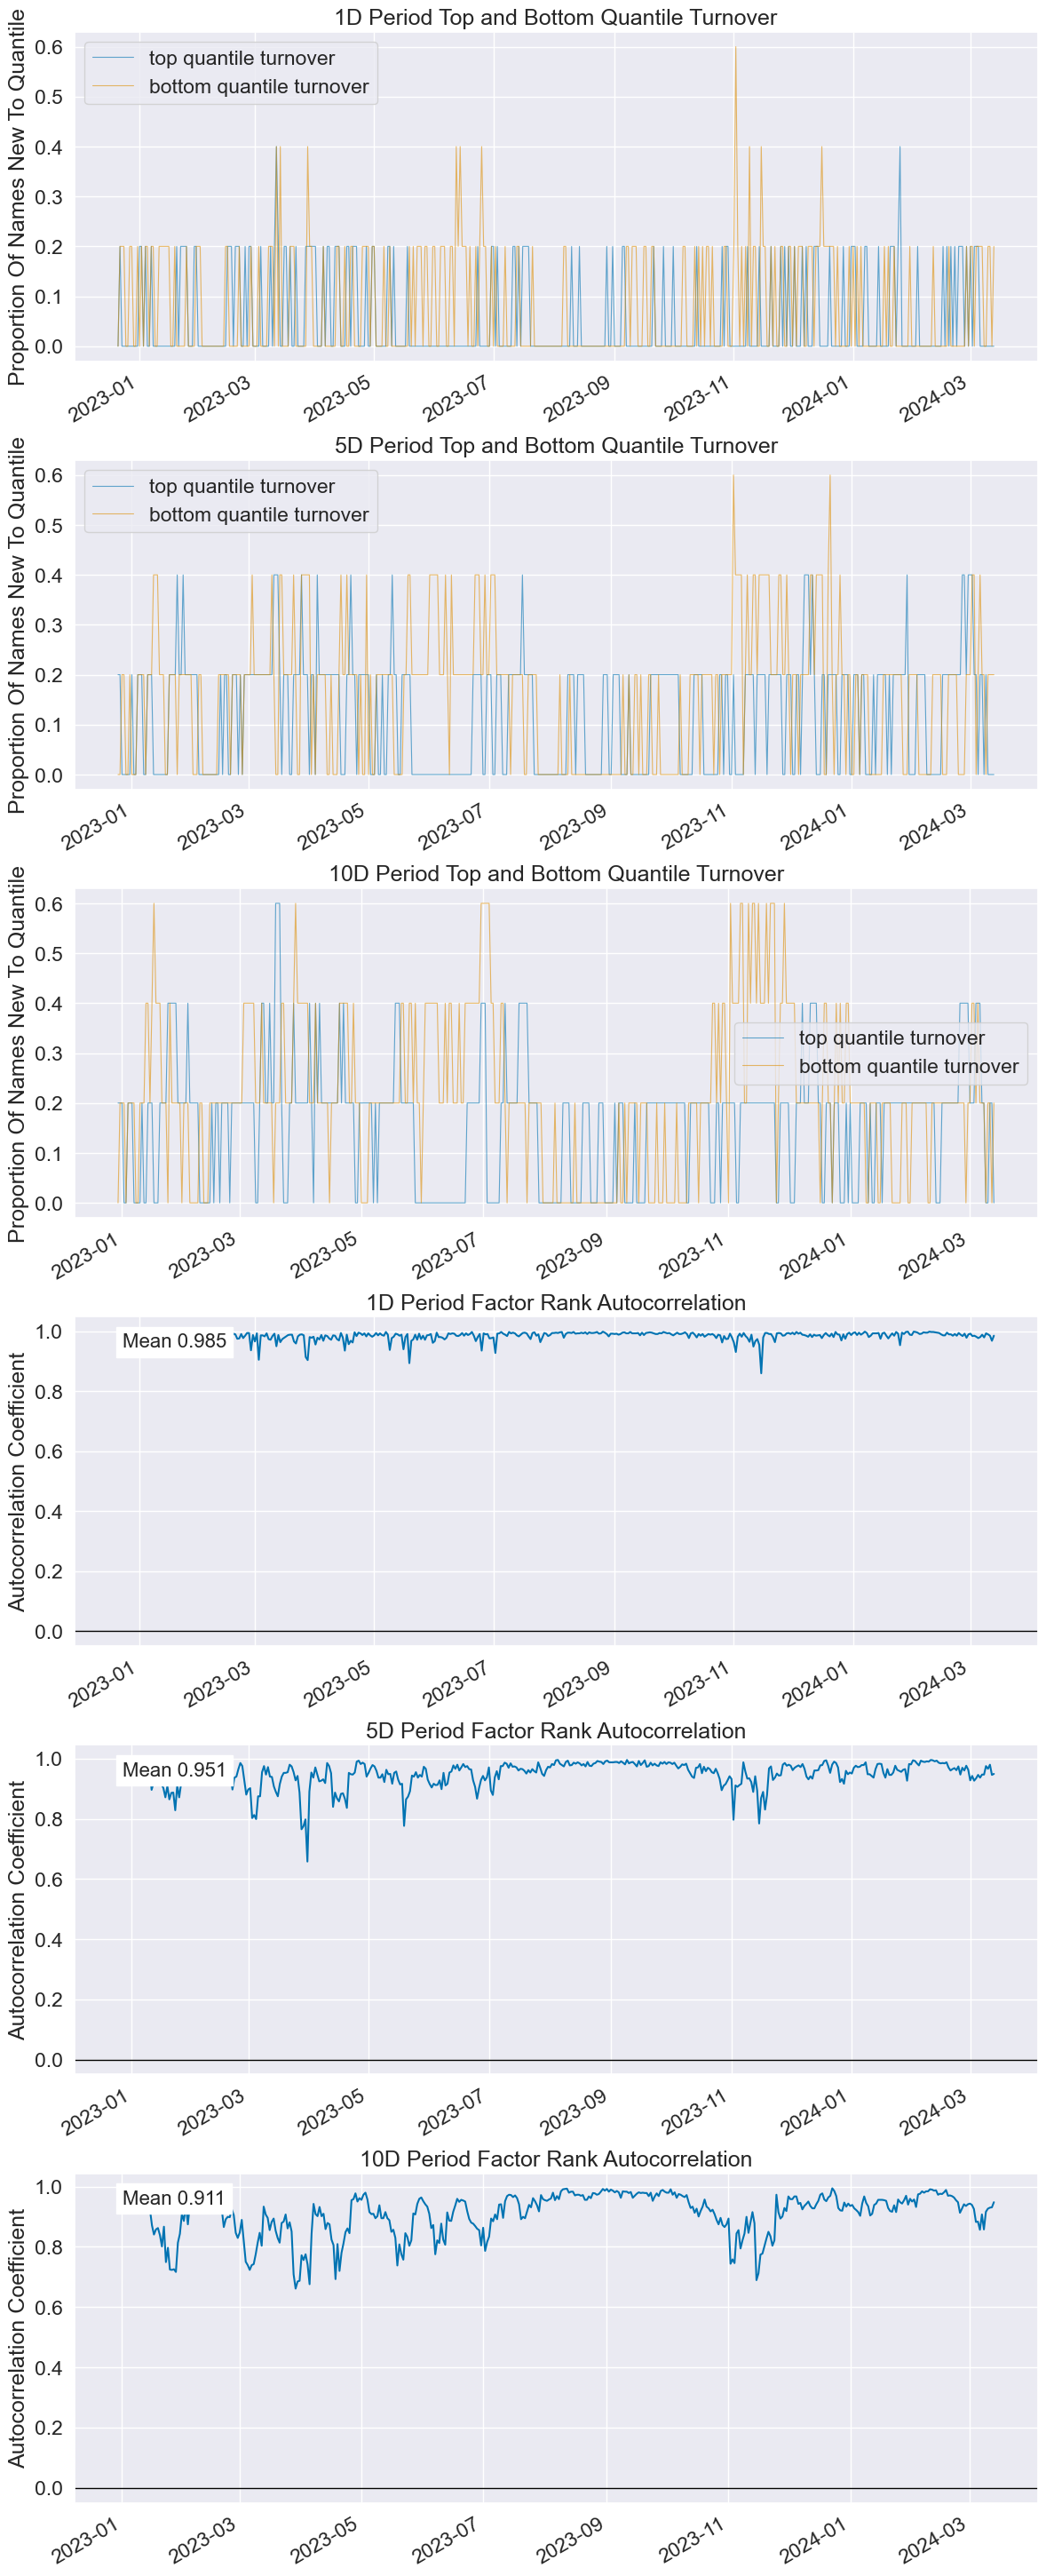

In [11]:
factor = sharpe_factor.dropna()
factor = factor.unstack().swaplevel(i=0, j=1)

factor_daily = factor.sort_index()

close_daily = Close

# Ingest and format data
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_daily,
                                                                   close_daily,
                                                                   quantiles=5)

# Run analysis
alphalens.tears.create_full_tear_sheet(factor_data)

### Momentum Factor

In [ ]:
MF = ts_pct_change(Close, 7)
returns_by_period, _ = PerformanceGenerator(factor = MF, 
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                            ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        22.16 %        |       26.47 %        |     0.58     |    13.40 %     |   20.49 %    |  28.66 %   | 1.50 % | 52.07 %  |
|  Benchmark  |       182.68 %        |       124.04 %       |     1.55     |    92.10 %     |   29.54 %    |  50.25 %   | 2.63 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [ ]:
split_date = ['W-MON', 'W-TUE', 'W-WED', 'W-THU', 'W-FRI', 'W-SAT', 'W-SUN']
for date in split_date:
    print(date)
    Close_WD = Close.resample(date).last()
    MF = Close_WD.pct_change()
    expreturn_WD = Close_WD.pct_change().shift(-2)
    returns_by_period, _ = PerformanceGenerator(factor = MF, 
                                                expreturn = expreturn_WD,
                                                strategy = 'LS',
                                                buy_fee = 0.04/100,
                                                sell_fee = 0.04/100,
                                                start_time = '2020-01-01',
                                                end_time = '2024-03-19',
                                                period_of_year = 52,
                                                #benchmark = Benchmark
                                                ).backtest()

W-MON
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        6.14 %         |        9.34 %        |    0.28 %    |     3.81 %     |   20.41 %    |  20.84 %   | 2.89 % | 138.58 % |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


W-TUE
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        47.36 %        |       41.45 %        |    1.42 %    |    27.49 %     |   13.70 %    |  18.24 %   | 2.53 % | 137.46 % |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


W-WED
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        3.63 %         |        7.27 %        |    0.21 %    |     2.26 %     |   25.49 %    |  21.70 %   | 3.01 % | 139.10 % |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


W-THU
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        46.83 %        |       42.97 %        |    1.11 %    |    27.21 %     |   12.42 %    |  24.18 %   | 3.35 % | 139.64 % |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


W-FRI
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        58.64 %        |       50.36 %        |    1.37 %    |    33.52 %     |   13.76 %    |  23.02 %   | 3.19 % | 138.39 % |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


W-SAT
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        31.33 %        |       31.87 %        |    0.83 %    |    18.62 %     |   18.87 %    |  23.99 %   | 3.33 % | 136.91 % |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


W-SUN
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        -3.73 %        |        0.54 %        |    0.01 %    |    -2.35 %     |   21.75 %    |  23.46 %   | 3.25 % | 138.70 % |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


Dropped 3.9% entries from factor data: 3.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


min       max      mean       std  count    count %
factor_quantile                                                          
1               -0.512871  0.156859 -0.052864  0.078389   2830  22.727273
2               -0.265971  0.164589 -0.015936  0.070129   2264  18.181818
3               -0.193886  0.188743  0.003329  0.071343   2264  18.181818
4               -0.181397  0.229629  0.026085  0.077692   2264  18.181818
5               -0.164481  0.684498  0.103359  0.138574   2830  22.727273

Returns Analysis


1D      5D     10D
Ann. alpha                                     0.160   0.141   0.178
beta                                           0.045   0.108   0.109
Mean Period Wise Return Top Quantile (bps)     8.509  13.403  15.708
Mean Period Wise Return Bottom Quantile (bps) -0.760  -1.513  -3.637
Mean Period Wise Spread (bps)                  9.269  14.469  18.866

<Figure size 640x480 with 0 Axes>

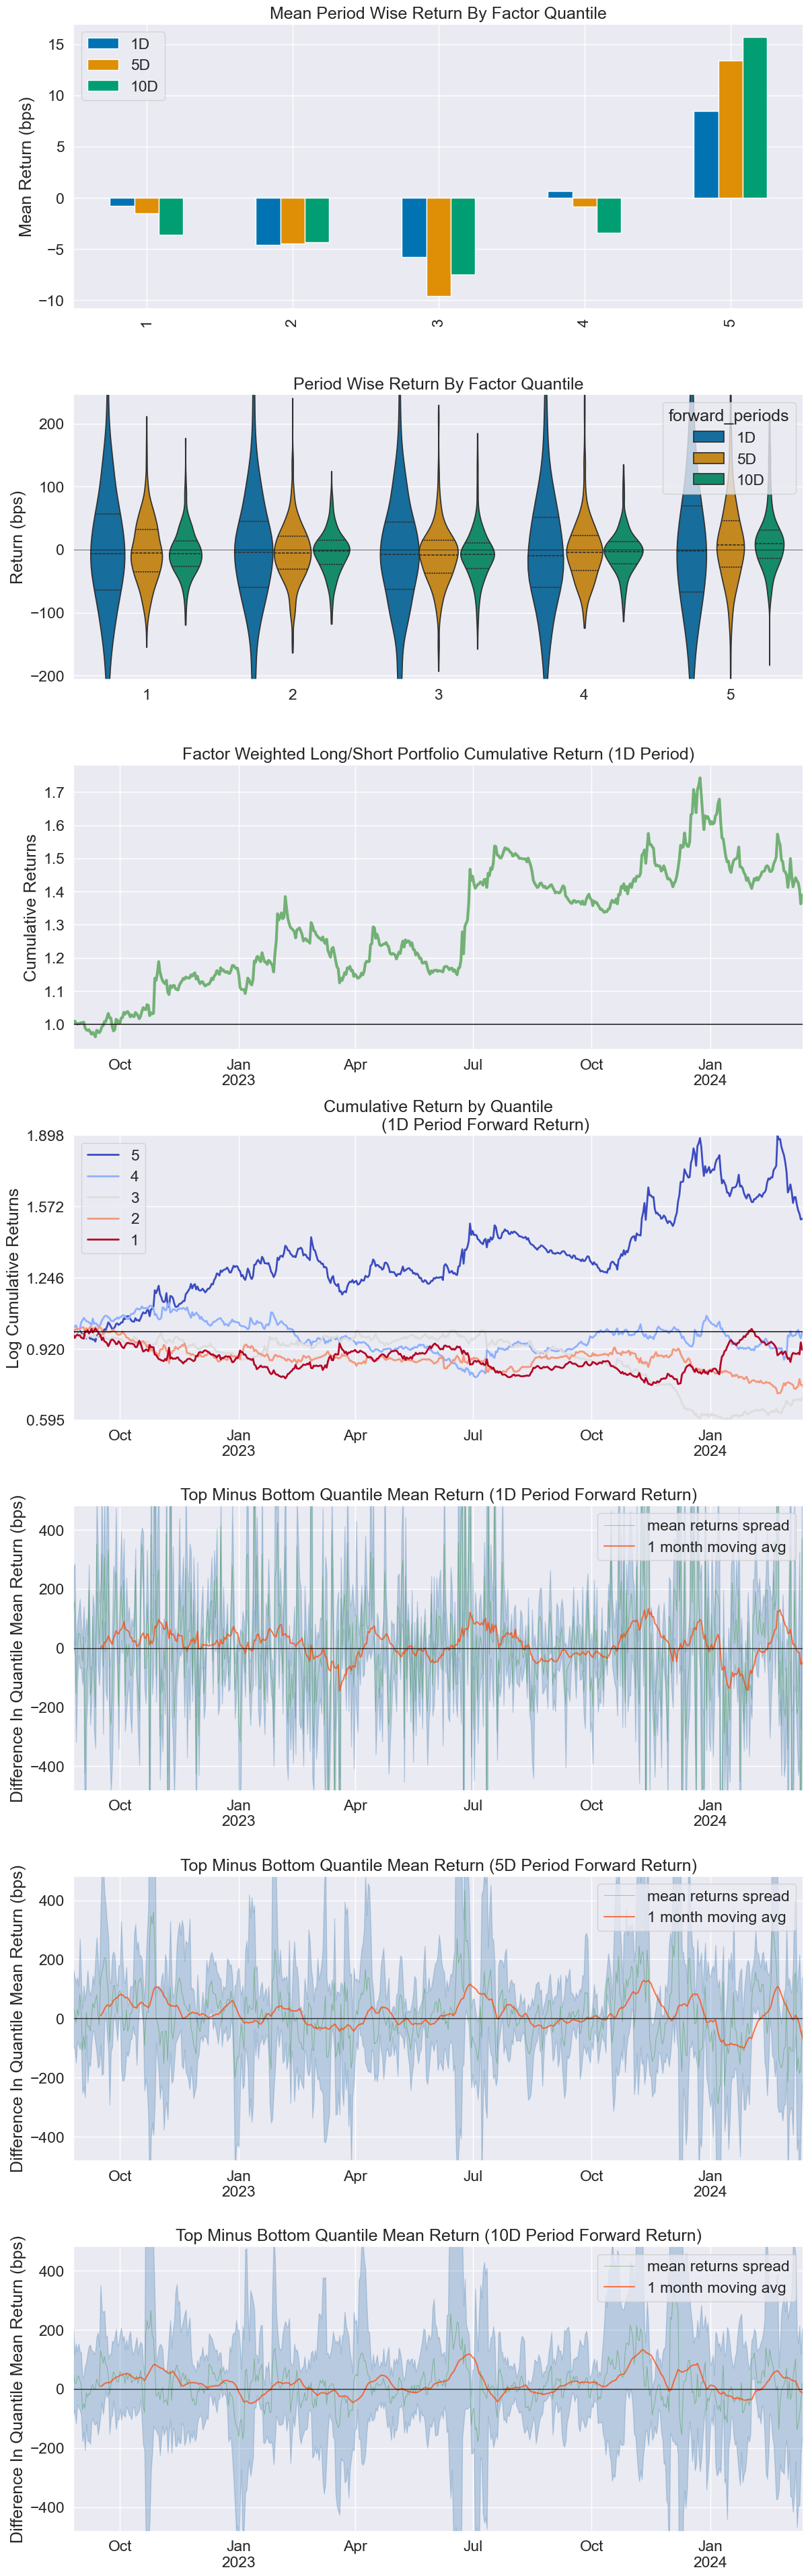

Information Analysis


1D     5D    10D
IC Mean          -0.022 -0.002  0.033
IC Std.           0.270  0.275  0.259
Risk-Adjusted IC -0.082 -0.008  0.126
t-stat(IC)       -1.959 -0.184  2.989
p-value(IC)       0.051  0.854  0.003
IC Skew           0.156  0.036 -0.069
IC Kurtosis      -0.385 -0.486 -0.469

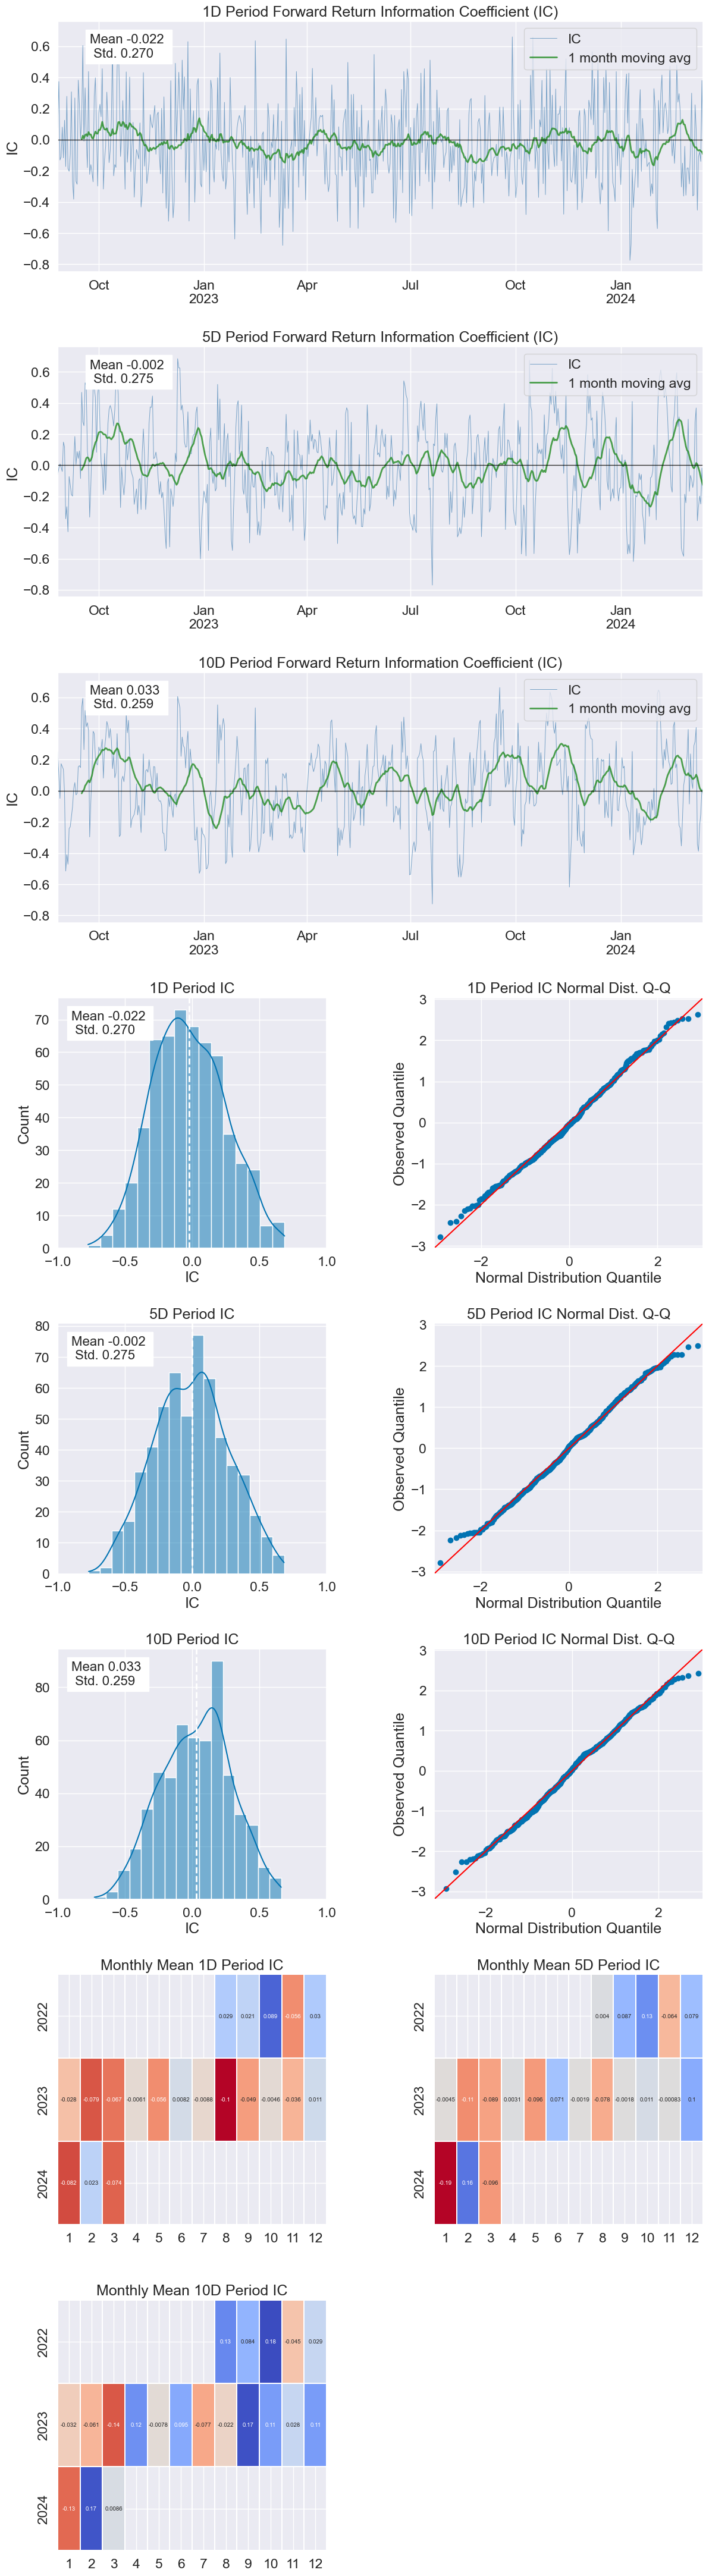

Turnover Analysis


/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/alphalens/utils.py:929: UserWarning:

Skipping return periods that aren't exact multiples of days.



1D     5D    10D
Quantile 1 Mean Turnover   0.109  0.549  0.769
Quantile 2 Mean Turnover   0.108  0.544  0.772
Quantile 3 Mean Turnover   0.112  0.564  0.796
Quantile 4 Mean Turnover   0.116  0.584  0.807
Quantile 5 Mean Turnover   0.103  0.517  0.706

1D     5D  10D
Mean Factor Rank Autocorrelation  0.854  0.265 -0.0

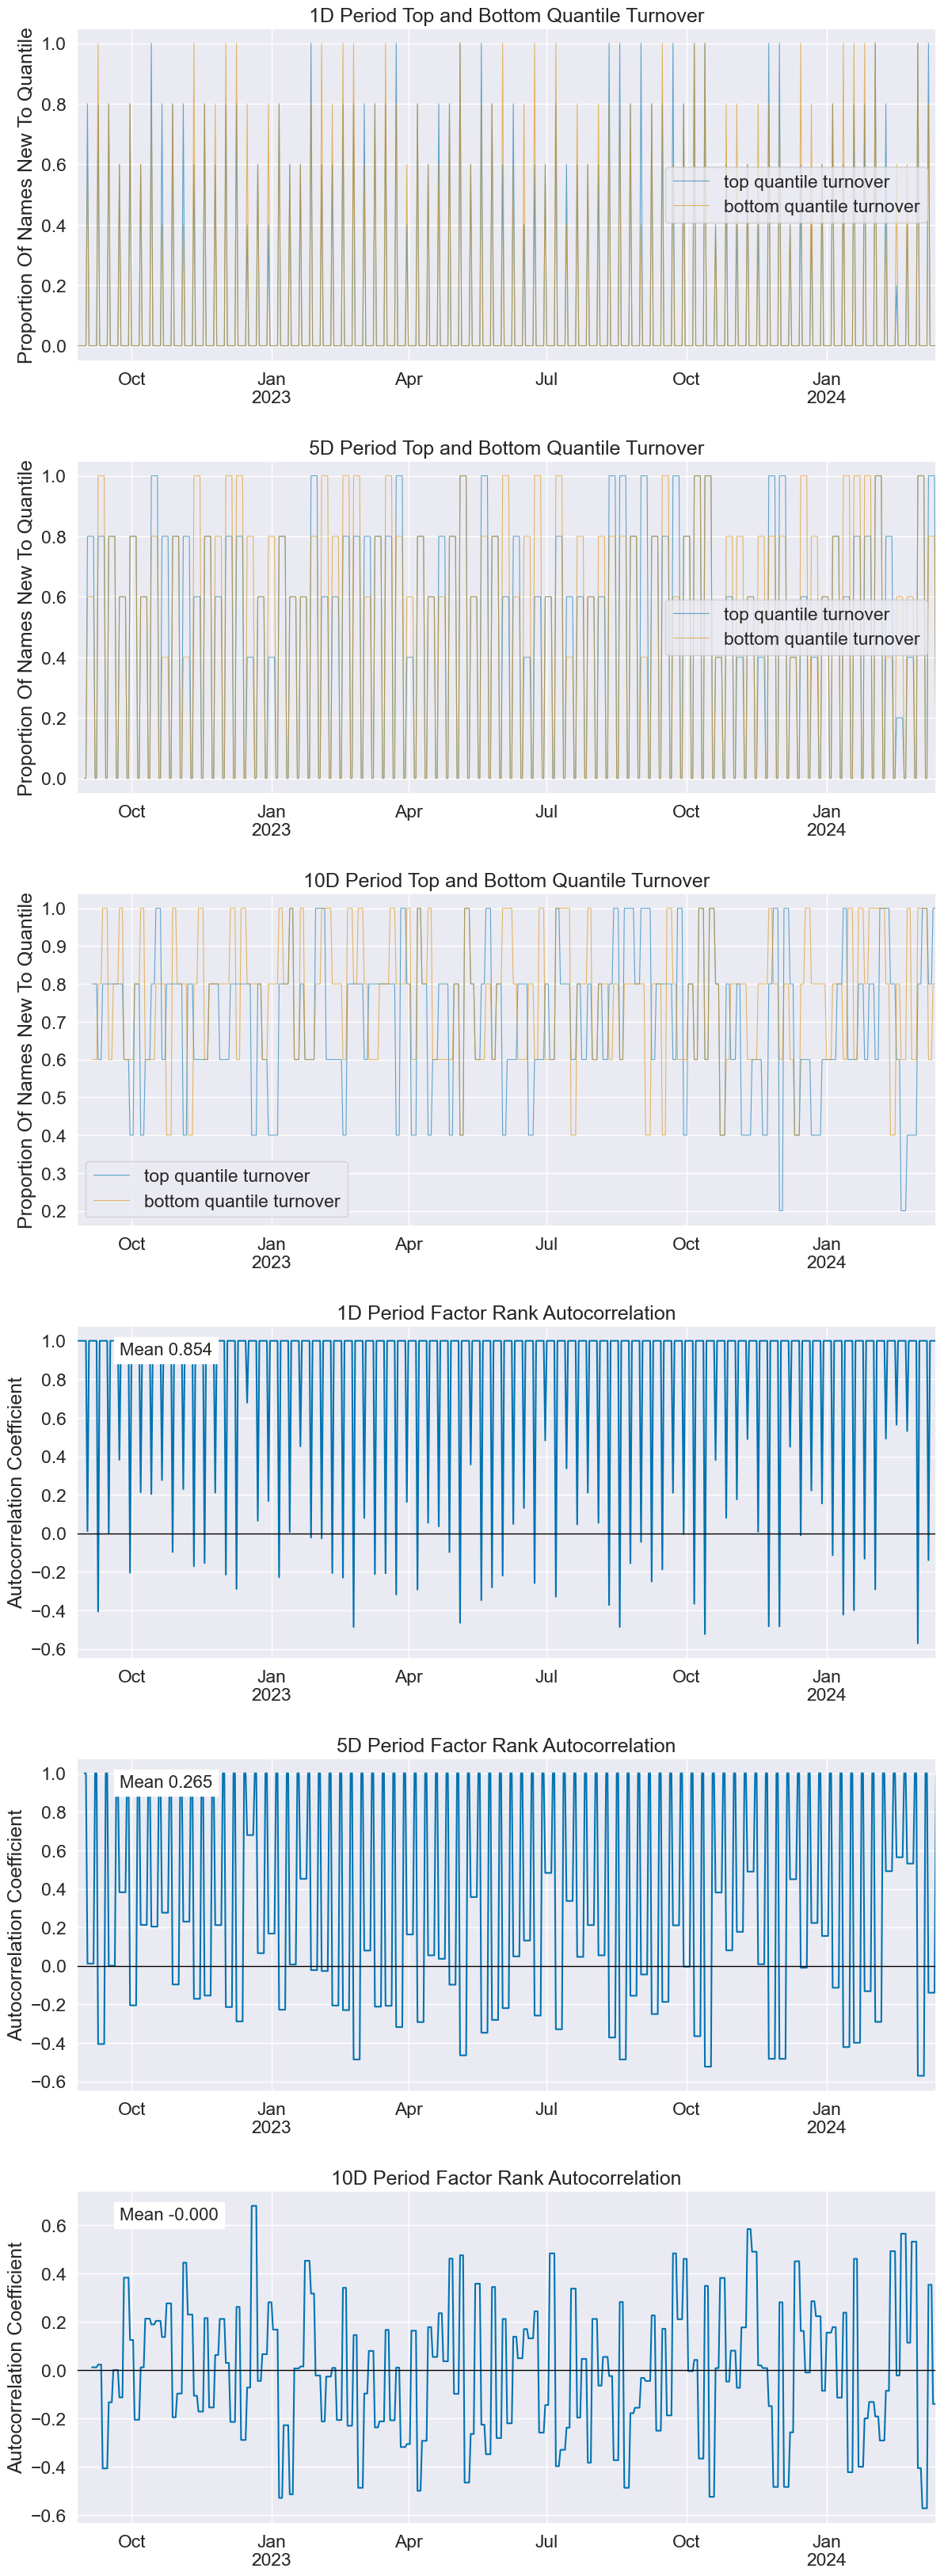

In [ ]:
import alphalens

Close_WD = Close.resample('W-FRI').last()
factor = Close_WD.pct_change().resample('D').ffill()
factor = factor.unstack().swaplevel(i=0, j=1)

factor_daily = factor.sort_index()

close_daily = Close

# Ingest and format data
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_daily,
                                                                   close_daily,
                                                                   quantiles=5)

# Run analysis
alphalens.tears.create_full_tear_sheet(factor_data)

/Users/tedting/Documents/FactorTradingSystem/test/../backtest/performance_generater.py:100: RuntimeWarning:

invalid value encountered in scalar divide



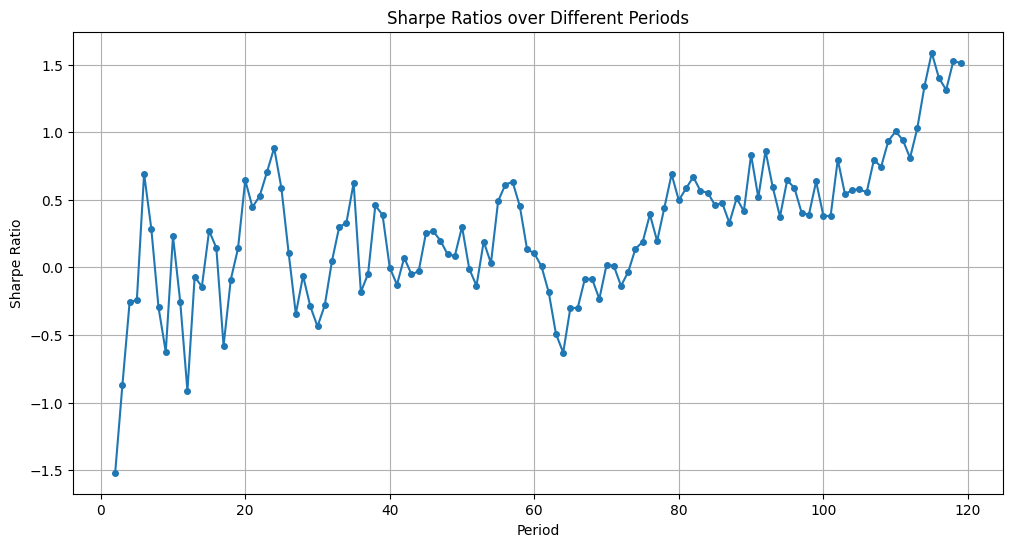

In [25]:
sharpes = []
periods = []

period_range = range(1, 120, 1)

# Iterate over all combinations of period_1 and period_2 using itertools.product
for period in period_range:
    LogRet= np.log(Close/Close.shift(1))
    R_F = LogRet.rolling(window=period).sum().dropna()
    alpha_2 = ts_rank(R_F, period)
    returns_by_period = PerformanceGenerator(alpha_2,
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                             ).get_returns_by_period()
    sharpe = PerformanceGenerator(alpha_2,
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                             ).get_sharpe(returns_by_period)

    sharpes.append(sharpe)
    periods.append(period)

import matplotlib.pyplot as plt

# Plot Sharpe Ratios over periods
plt.figure(figsize=(12, 6))
plt.plot(periods, sharpes, marker='o', linestyle='-', markersize=4)
plt.xlabel('Period')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios over Different Periods')
plt.grid(True)
plt.show()

In [23]:
LogRet= np.log(Close/Close.shift(1))
R_F = LogRet.rolling(window=50).sum().dropna()
R_F
returns_by_period, _ = PerformanceGenerator(factor = R_F, 
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                            ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        63.39 %        |       53.30 %        |     1.52     |    40.14 %     |   19.44 %    |  24.06 %   | 1.26 % | 18.13 %  |
|  Benchmark  |       235.74 %        |       138.49 %       |     1.95     |    129.91 %    |   25.91 %    |  48.82 %   | 2.56 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+


In [24]:
period = 125
rolling_returns = returns.rolling(window = period).mean()
rolling_std_dev = returns.rolling(window = period).std()
sharpe_factor = rolling_returns / rolling_std_dev

Close_WD = Close.resample('W-FRI').last()
fri_returns_factor = Close_WD.pct_change().resample('D').ffill()

LogRet= np.log(Close/Close.shift(1))
R_F = LogRet.rolling(window=50).sum().dropna()

Multi_alpha = sharpe_factor + fri_returns_factor + R_F
returns_by_period, _ = PerformanceGenerator(factor = Multi_alpha, 
                                            expreturn = expreturn,
                                            strategy = 'LS',
                                            buy_fee = 0.04/100,
                                            sell_fee = 0.04/100,
                                            start_time = '2020-01-01',
                                            end_time = '2024-03-19',
                                            period_of_year = 365,
                                            benchmark = Benchmark
                                            ).backtest()

+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
|             | Cumprod Total Returns | Cumsum Total Returns | Sharpe Ratio | Annualized Ret | Max Drawdown | Volatility |  STD   | Turnover |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
| Performance |        72.76 %        |       58.73 %        |     1.63     |    40.99 %     |   18.92 %    |  22.61 %   | 1.18 % | 13.80 %  |
|  Benchmark  |       182.68 %        |       124.04 %       |     1.55     |    92.10 %     |   29.54 %    |  50.25 %   | 2.63 % |   nan    |
+-------------+-----------------------+----------------------+--------------+----------------+--------------+------------+--------+----------+
